# Homework 3

## ASTR 5900, Fall 2020, University of Oklahoma

### MCMC

# Problem 1 (the only problem)

Consider a 2D lattice of size $L \times L$.  In this model, we want to randomly assign a value of 0 or 1 to each of the lattice sites in such a way that no two adjacent vertices both take the value of 1 (two lattice sites are adjacent if they share an edge).  A configuration that meets this condition is known as *feasible*.  For now we will pick random configurations such that each feasible configuration has an equal probability, while infeasible configurations have a probability of precisely 0.  One might ask,what is the expected number of 1's in our grid?  That is: 

$$ E \left[ n(X)\right]  = \sum_{\xi} n(\xi) P(\xi)$$
where $\xi$ is a possible configuration.  This is a similar problem to one we do in condensed matter physics, where we try to get a fair sample of interacting spins on a lattice.

Write your own MCMC algorithm from scratch to evaluate this expectation value for a grid of length 8.  You are limited to default python and the `numpy` package.  Parts of the algorithm are written already, but feel free to write your own versions.  I've also included a plotting function if you want to look at a configuration.

In order to use an MCMC algorithm for this model, you must use a Markov chain whose state space is the set of all feasible configurations.  In order to have a stationary distribution, the Markov chain must be aperiodic and irreducible.  Such a Markov chain can be constructed by the following process.

1. Start in a feasible configuration.

2. For each integer time $t+1$:

    1. Pick a vertex at random, uniformly 
    2. Toss a fair coin 
    3. If the coin is heads and all neighbors of the vertex is 1, set the vertex to 1. Set the vertex to 0 otherwise.
    
From your trajectory through state space, estimate that expectation value.  Finally, briefly discuss why we must use MCMC for this problem.  Be specific about why we can't sample the state space exactly.


____________________________________________________________

## $\textit{Answer}:$

We'll start by by initializing a possible ocnfiguration $\xi$. After making an empty state, we'll flip a coin at each entry in the lattice and run the provided `neighbor` function to see if we can update the value of that vertex. 

In [2]:
## Initiate python stuff
## Execute twice to make sure it takes effect
%pylab inline
import numpy as np
import scipy.stats

fontsize = 20
figsize = (10,6)

# Configure parameters
plt.rcParams.update({'font.size': fontsize, 'figure.figsize': figsize})

# Default tick label size
plt.rcParams['xtick.labelsize'] = fontsize
plt.rcParams['ytick.labelsize'] = fontsize
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.size'] = 8
plt.rcParams['ytick.major.size'] = 8
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.major.width'] = 2

plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True
plt.rcParams['axes.linewidth'] = 2

Populating the interactive namespace from numpy and matplotlib


/home/idies/miniconda3/envs/py37/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['figsize']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


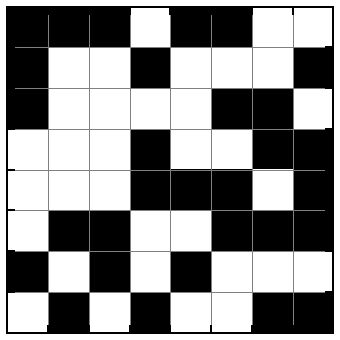

In [3]:
# Initialize empty state
SIZE = 8        # length of square volume
PROB = 0.5      # coin flip probability


init = np.zeros((SIZE,SIZE), dtype = int)
for i in range(0,len(init[0])):
    for j in range(0,len(init[0])):
        init[i][j] = np.random.randint(2)
    
        
            
def plot(state):
    """Plot the input state"""

    plt.axis([0,SIZE,0,SIZE])
    plt.xticks(np.arange(0,SIZE+1), [])
    plt.yticks(np.arange(0,SIZE+1), [])
    plt.tick_params(axis='both', top='off', which="both", bottom="off", right="off", left="off")
    plt.grid(True, color='gray', linestyle='-', linewidth=1)
    plt.imshow(state,cmap="Greys", interpolation='nearest', extent=[0,SIZE,0,SIZE])
    plt.show()

plot(init)

As we can see, so far this state as it stands is not feasible. We'll run this state through the provided `neighbors` function so that we can use this as our initial feasible state:

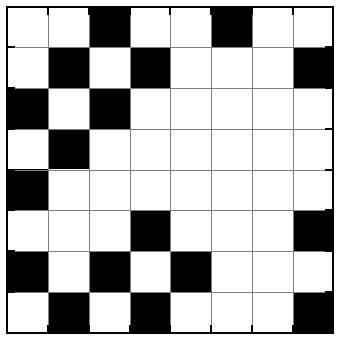

In [4]:
def neighbors(state, v):
    """
    Determine if the site at vertex v of the lattice state can be turned to 1.
    Return True if site at v can be turned on.  Otherwise return False.
    
    Parameters
    ----------
    state (2d array) : The 2d ndarray of the lattice.
    
    v (2-tuple) : the coordinates of the site tested for flip to 1.
    """
    
    row,col = v
    
    #check vertical neighbors
    if row > 0:
        #look at top neighbor
        if state[row-1,col] == 1:
            return False
    if row < SIZE-1:
        #look at bottom neighbor
        if state[row+1,col] == 1:
            return False
            
    #now horizontal neighbors
    if col > 0:
        #look at left neighbor
        if state[row,col-1] == 1:
            return False
    if col < SIZE-1:
        #look at right neighbor
        if state[row,col+1] == 1:
            return False
            
    return True



# Loop through

for i in range(0,SIZE):
    for j in range(0,SIZE):
         init[i][j] = neighbors(init,(i,j))
            
# Inspect 
plot(init)

That's better. Now that we have our initial feasible state, the plan is to pick a random vertex at different time steps, preform the same coin flip we evaulated to make our inital state, run the neighbor check, and determine if we can update the value of that vertex:

In [15]:
# Begin loop
times = np.arange(0,1000,1)

success = np.zeros(len(times))

for i in range(0,len(times)):
    
    # Pick coordinates of vertex at random
    row = np.random.randint(0,8)
    column = np.random.randint(0,8)
    
    # Flip a coin
    flip = np.random.binomial(1,PROB)
    
    # Check for neighbors
    VibeCheck = neighbors(init,(row,column))
    
    # Update state if criteria met
    if flip & VibeCheck:
        init[row][column] = 1
        
    if not flip:
        init[row][column] = 0
        
    # Record number of nonzero vertices
    here = np.where(init == 1)
    success[i] = len(here[0])


Text(0, 0.5, 'Number of Active (Non-Zero) Vertices')

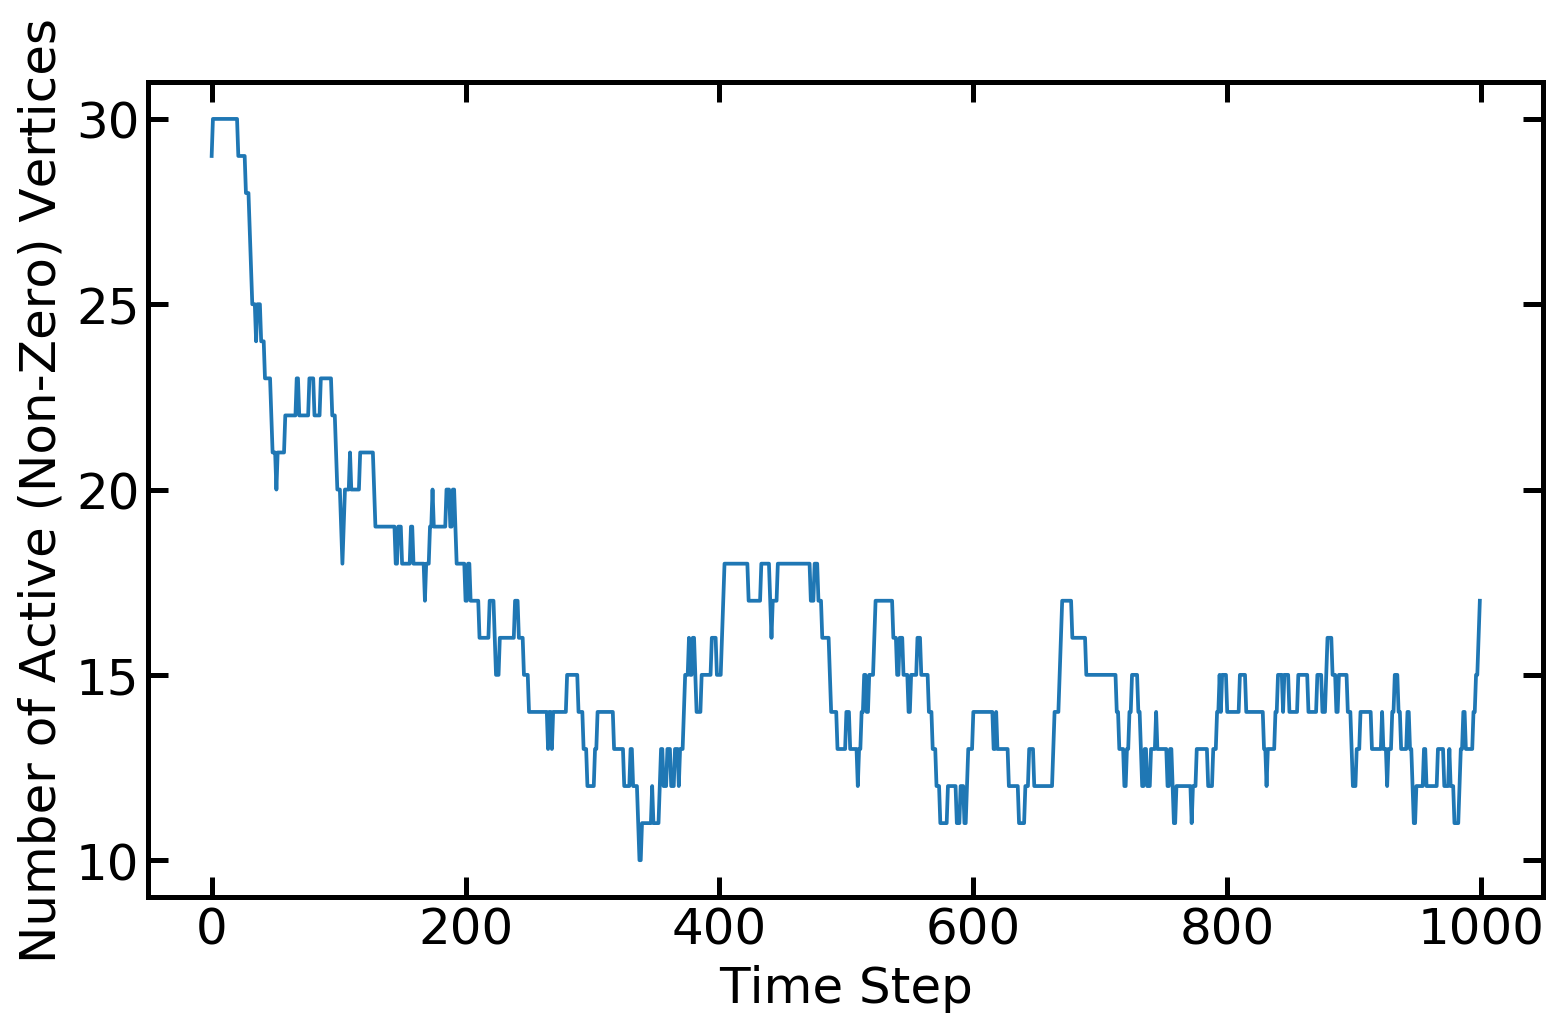

In [16]:
# Inspect output
plt.figure(dpi = 180)
plt.plot(times,success)
plt.xlabel("Time Step")
plt.ylabel("Number of Active (Non-Zero) Vertices")

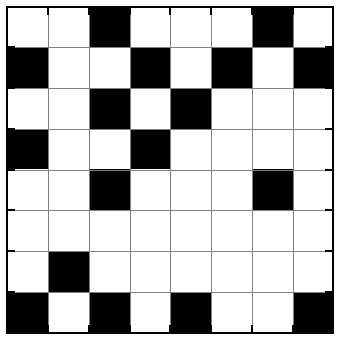

In [17]:
# Inspect final output
plot(init)

Inspection of the above time evolution shows that we started off near a perfect checker pattern (about 30 active vertices) but converged to around 15 after running the MC. I have an idea as to why this might be the case, but first let's run the algorithm a few more times:

In [18]:
# Create state
init_2 = np.zeros((SIZE,SIZE), dtype = int)
for i in range(0,len(init[0])):
    for j in range(0,len(init[0])):
        init_2[i][j] = np.random.randint(2)

# Ensure feasibility of initial state
for i in range(0,SIZE):
    for j in range(0,SIZE):
         init_2[i][j] = neighbors(init_2,(i,j))

# Repeat above procedure
success_2 = np.zeros(len(times))
for i in range(0,len(times)):
    
    # Pick coordinates of vertex at random
    row = np.random.randint(0,8)
    column = np.random.randint(0,8)
    
    # Flip a coin
    flip = np.random.binomial(1,PROB)
    
    # Check for neighbors
    VibeCheck = neighbors(init_2,(row,column))
    
    # Update state if criteria met
    if flip & VibeCheck:
        init_2[row][column] = 1
        
    if not flip:
        init_2[row][column] = 0
        
    # Record number of nonzero vertices
    here = np.where(init_2 == 1)
    success_2[i] = len(here[0])



In [19]:
# And again
# Create state
init_3 = np.zeros((SIZE,SIZE), dtype = int)
for i in range(0,len(init[0])):
    for j in range(0,len(init[0])):
        init_3[i][j] = np.random.randint(2)

# Ensure feasibility of initial state
for i in range(0,SIZE):
    for j in range(0,SIZE):
         init_3[i][j] = neighbors(init_3,(i,j))

# Repeat above procedure
success_3 = np.zeros(len(times))
for i in range(0,len(times)):
    
    # Pick coordinates of vertex at random
    row = np.random.randint(0,8)
    column = np.random.randint(0,8)
    
    # Flip a coin
    flip = np.random.binomial(1,PROB)
    
    # Check for neighbors
    VibeCheck = neighbors(init_3,(row,column))
    
    # Update state if criteria met
    if flip & VibeCheck:
        init_3[row][column] = 1
        
    if not flip:
        init_3[row][column] = 0
     
    
        
    # Record number of nonzero vertices
    here = np.where(init_3 == 1)
    success_3[i] = len(here[0])



In [20]:
# And again...

# Create state
init_4 = np.zeros((SIZE,SIZE), dtype = int)
for i in range(0,len(init[0])):
    for j in range(0,len(init[0])):
        init_4[i][j] = np.random.randint(2)

# Ensure feasibility of initial state
for i in range(0,SIZE):
    for j in range(0,SIZE):
         init_4[i][j] = neighbors(init_4,(i,j))

# Repeat above procedure
success_4 = np.zeros(len(times))
for i in range(0,len(times)):
    
    # Pick coordinates of vertex at random
    row = np.random.randint(0,8)
    column = np.random.randint(0,8)
    
    # Flip a coin
    flip = np.random.binomial(1,PROB)
    
    # Check for neighbors
    VibeCheck = neighbors(init_4,(row,column))
    
    # Update state if criteria met
    if flip & VibeCheck:
        init_4[row][column] = 1
    
    if not flip:
        init_4[row][column] = 0
        
    # Record number of nonzero vertices
    here = np.where(init_4 == 1)
    success_4[i] = len(here[0])



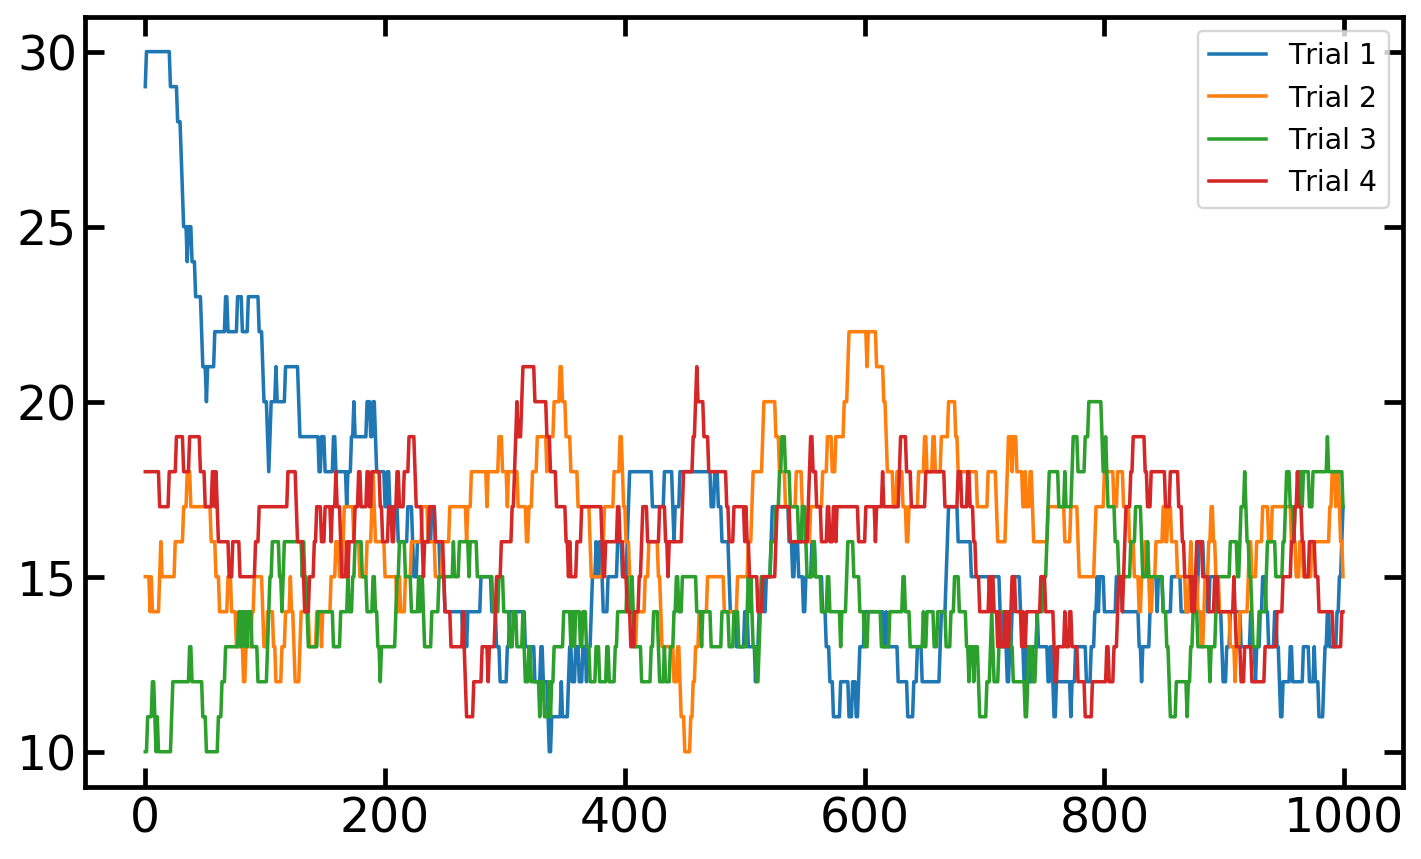

In [21]:
# Compare
plt.figure(dpi = 170)
plt.plot(times,success, label = 'Trial 1')
plt.plot(times,success_2, label = 'Trial 2')
plt.plot(times,success_3, label = 'Trial 3')
plt.plot(times,success_4, label = 'Trial 4')
plt.legend(loc = 'best', fontsize = 12)

In [22]:
# Inspect average values
print('Expectation Value of Trial 1: ' + str(np.mean(success)))
print('Expectation Value of Trial 2: ' + str(np.mean(success_2)))
print('Expectation Value of Trial 3: ' + str(np.mean(success_3)))
print('Expectation Value of Trial 4: ' + str(np.mean(success_4)))


print("Mean of trails: " + str((np.mean(success) + np.mean(success_2) +np.mean(success_3) + np.mean(success_4))/4))

Expectation Value of Trial 1: 15.739
Expectation Value of Trial 2: 16.305
Expectation Value of Trial 3: 14.233
Expectation Value of Trial 4: 15.988
Mean of trails: 15.56625


Thus, the expected number of filled vertices is sitting somewhere around 15. Why might this be? I imagine it has to do with the fact that our Markov chain is aperiodic and irreducible. If we don't set the site values to be zero when the coin flip is tails (as I mistakenly did for my first attempt at this assignment), the expected number of filled vertices converges to 25 or so, suggesting that this when the Markov Chain runs out of possible values and terminates since every vertex has an adjacent neighbor. 

The reason the expectation value is around half of a filled checkborard is because this number maximizes the number of possibilities / configurations in the markov chain. Thinking about it statistically, the number of microstates is higher for a macrostate of $N_{filled} = 15$ compared to something like $N_{filled} = 30$, which may only have a couple possible configurations.

I imagine MCMC was necessary for this analysis since the probability of each step in the Markov chain is independent of the prevoius steps probabiliity. In this way we can hop around from vertex to vertex and sample parameter space.